# Order Prediction 

## Importing necessary libraries and upgrading pip

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
pip install lightgbm

Error processing line 3 of /Users/adityasood/opt/anaconda3/lib/python3.9/site-packages/googleapis_common_protos-1.60.0-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/adityasood/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install --upgrade pip

Error processing line 3 of /Users/adityasood/opt/anaconda3/lib/python3.9/site-packages/googleapis_common_protos-1.60.0-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/adityasood/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Note: you may need to restart the kernel to use updated packages.


## Importing the Dataset and viewing first five values

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/supplement.csv")
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


## Gathering some information about the structure and contecnts of the Dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


## Checking for Null Values

In [6]:
data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

## Statistical Summary of the Dataset

In [7]:
data.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


## Number of Orders recieved according to Store

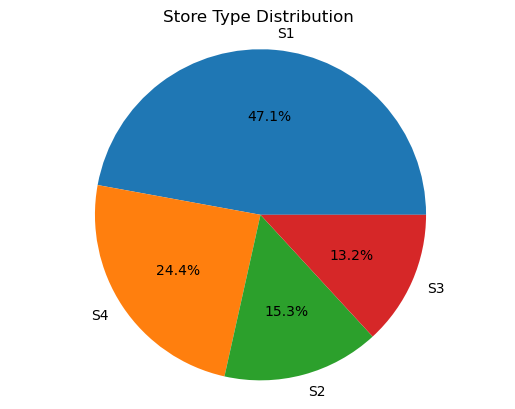

In [8]:
import matplotlib.pyplot as plt

pie = data["Store_Type"].value_counts()
labels = pie.index
sizes = pie.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Store Type Distribution')
plt.show()

## Number of Orders according to Location

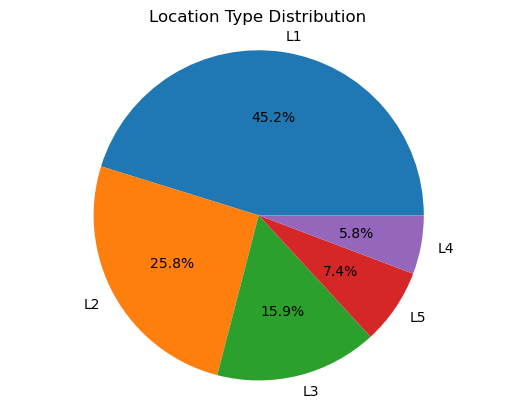

In [9]:
pie2 = data["Location_Type"].value_counts()
labels = pie2.index
sizes = pie2.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Location Type Distribution')
plt.show()

## Number of Orders according to Discount

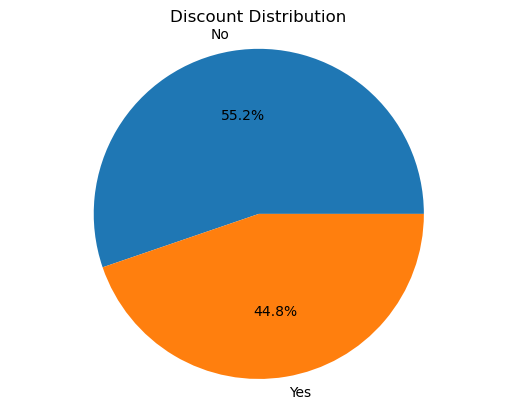

In [10]:
pie3 = data["Discount"].value_counts()
labels = pie3.index
sizes = pie3.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Discount Distribution')
plt.show()

## Checking whether Holidays affect number of Orders

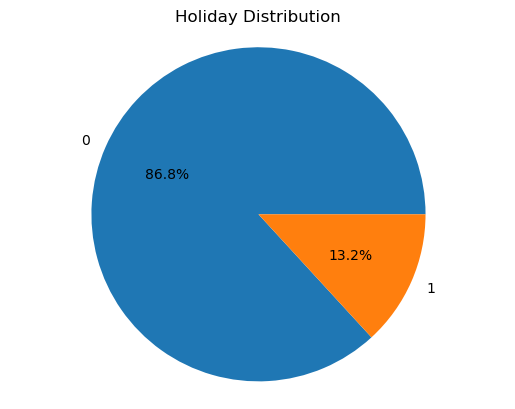

In [11]:
pie4 = data["Holiday"].value_counts()
labels= pie4.index
sizes = pie4.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Holiday Distribution')
plt.show()

## Preparing Data to train the Model

In [12]:
data["Discount"] = data["Discount"].map({"No": 0, "Yes": 1})
data["Store_Type"] = data["Store_Type"].map({"S1": 1, "S2": 2, "S3": 3, "S4": 4})
data["Location_Type"] = data["Location_Type"].map({"L1": 1, "L2": 2, "L3": 3, "L4": 4, "L5": 5})
data.dropna()

x = np.array(data[["Store_Type", "Location_Type", "Holiday", "Discount"]])
y = np.array(data["#Order"])

## Splitting into Training and Test Sets

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## Using Light Gradient Boosting Regression Algorithm to Train Model

In [14]:
import lightgbm as ltb
model = ltb.LGBMRegressor()
model.fit(xtrain, ytrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 150672, number of used features: 4
[LightGBM] [Info] Start training from score 68.163401


LGBMRegressor()

## Viewing the Predicted Values

In [15]:
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Orders": ypred.flatten()})
print(data.head())

   Predicted Orders
0         47.351897
1         97.068717
2         66.577788
3         85.143083
4         54.451098
